
# Кейс спринта


В этом кейсе вы будете работать с данными «Карты ДТП» — некоммерческого проекта, посвящённого проблеме дорожно-транспортных происшествий в России. Вы могли знакомиться с этим проектом в Песочнице прошлого спринта.

Заказчик предлагает продолжить исследование данных и изучить взаимосвязи. Особенно заказчика интересует, с чем может быть связана аварийность на дорогах.

## Что нужно сделать
Выполнить предобработку для удобства работы с данными: выбрать оптимальные названия столбцов и типы данных. Вам также понадобится дать ответы на вопросы заказчика.

Если вы не работали с прошлой Песочницей, то всё равно можете выполнить этот проект. Для удобства советуем изменить названия столбцов датафрейма, используя код ниже:

```
import pandas as pd

df = pd.read_csv('путь до папки с файлами/Kirovskaya_oblast.csv')
df.columns = [c.replace('properties.', '') for c in df.columns]

```


### Вопросы заказчика

1. Как распределено количество участников ДТП и почему? Встречаются ли аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Для числа участников найдите наиболее типичное значение. По желанию можете проверить распределения и других столбцов.

2. Предположите, между какими столбцами в датасете `Kirovskaya_oblast.csv` высокая корреляция. Проверьте своё предположение.  

3. Как связаны категории аварий и погодные условия?

4. Постройте процентную разбивку аварий по видам освещённости. При этом учитывайте пол участника и сделайте расчёты для мужчин и женщин отдельно.

5. Исследуйте, чем отличаются аварии без пострадавших от тех, в которых был один пострадавший или более.

6. Сделайте общий вывод о связи аварийности с другими факторами. Какие рекомендации вы можете дать заказчику?

## Описание данных

Датасет `Kirovskaya_oblast.csv` содержит информацию о ДТП в Кировской области:

* `geometry.coordinates` — координаты ДТП;

* `id` — идентификатор ДТП;

* `properties.tags` — тег происшествия;

* `properties.light` — освещённость;

* `properties.point.lat` — широта;

* `properties.point.long` — долгота;

* `properties.nearby` — ближайшие объекты;

* `properties.region` — регион;

* `properties.scheme` — схема ДТП;

* `properties.address` — ближайший адрес;

* `properties.weather` — погода;

* `properties.category` — категория ДТП;

* `properties.datetime` — дата и время ДТП;

* `properties.injured_count` — число пострадавших;

* `properties.parent_region` — область;

* `properties.road_conditions` — состояние покрытия;

* `properties.participants_count` — число участников;

* `properties.participant_categories` — категории участников.

`Kirovskaya_oblast_participiants.csv` хранит сведения об участниках:

* `role` — роль;

* `gender` — пол;

* `violations` — какие правила дорожного движения были нарушены конкретным участником;

* `health_status` — состояние здоровья после ДТП;

* `years_of_driving_experience` — число лет опыта;

* `id` — идентификатор ДТП.

In [1]:
# Загрузите данные и выполните небольшую предобработку
import pandas as pd

df = pd.read_csv('https://code.s3.yandex.net/datasets/Kirovskaya_oblast.csv')
df.columns = [c.replace('properties.', '') for c in df.columns]

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14517 entries, 0 to 14516
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   geometry.coordinates    14517 non-null  object 
 1   id                      14517 non-null  int64  
 2   tags                    14517 non-null  object 
 3   light                   14517 non-null  object 
 4   point.lat               14485 non-null  float64
 5   point.long              14485 non-null  float64
 6   nearby                  14517 non-null  object 
 7   region                  14517 non-null  object 
 8   scheme                  13380 non-null  float64
 9   address                 13843 non-null  object 
 10  weather                 14517 non-null  object 
 11  category                14517 non-null  object 
 12  datetime                14517 non-null  object 
 13  injured_count           14517 non-null  int64  
 14  parent_region           14517 non-null

In [3]:
df

,geometry.coordinates,id,tags,light,point.lat,point.long,nearby,region,scheme,address,weather,category,datetime,injured_count,parent_region,road_conditions,participants_count,participant_categories
0,"[47.875603, 57.24379]",1983180,Дорожно-транспортные происшествия,Светлое время суток,57.243790,47.875603,[],Яранский район,600.0,Р-176 Вятка Чебоксары - Йошкар-Ола - Киров - С...,['Дождь'],Опрокидывание,2017-07-01 18:00:00,1,Кировская область,['Мокрое'],3,['Все участники']
1,"[47.87903, 57.304807]",2889433,Дорожно-транспортные происшествия,Светлое время суток,57.304807,47.879030,"['Административные здания', 'Нерегулируемый пе...",Яранский район,710.0,"г Яранск, ул Кирова, 10",['Ясно'],Наезд на пешехода,2023-09-12 17:10:00,1,Кировская область,"['Сухое', 'Отсутствие, плохая различимость гор...",2,"['Все участники', 'Пешеходы']"
2,"[47.840781, 57.297156]",2591208,Дорожно-транспортные происшествия,Сумерки,57.297156,47.840781,"['Жилые дома индивидуальной застройки', 'Нерег...",Яранский район,NaN,"г Яранск, ул Чапаева, 80",['Пасмурно'],Съезд с дороги,2021-07-02 21:25:00,1,Кировская область,['Мокрое'],1,['Все участники']
3,"[47.834365, 57.244775]",2577639,Дорожно-транспортные происшествия,Светлое время суток,57.244775,47.834365,['Жилые дома индивидуальной застройки'],Яранский район,200.0,"м Знаменка, ул Кирова, 15",['Пасмурно'],Столкновение,2021-05-31 18:55:00,1,Кировская область,['Сухое'],2,"['Все участники', 'Мотоциклисты']"
4,"[47.968197, 57.357738]",1981026,Дорожно-транспортные происшествия,Светлое время суток,57.357738,47.968197,['Нерегулируемый перекрёсток неравнозначных ул...,Яранский район,NaN,"с/п Никольское, Киров-Советск- Яранск - подъез...",['Ясно'],Опрокидывание,2018-05-16 16:25:00,2,Кировская область,"['Сухое', 'Отсутствие, плохая различимость гор...",2,['Все участники']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14512,"[51.090943, 56.233566]",1981076,Дорожно-транспортные происшествия,Светлое время суток,56.233566,51.090943,['Жилые дома индивидуальной застройки'],Вятско-Полянский район,NaN,"г Вятские Поляны, ул Набережная, 6",['Ясно'],Иной вид ДТП,2018-05-17 06:20:00,1,Кировская область,['Сухое'],1,"['Все участники', 'Мотоциклисты']"
14513,"[50.8911, 56.1978]",1985930,Дорожно-транспортные происшествия,Сумерки,56.197800,50.891100,[],Вятско-Полянский район,330.0,NaN,['Ясно'],Столкновение,2019-05-30 18:35:00,1,Кировская область,['Сухое'],2,"['Все участники', 'Дети']"
14514,"[51.079817, 56.22997]",1985949,Дорожно-транспортные происшествия,Светлое время суток,56.229970,51.079817,"['Многоквартирные жилые дома', 'Выезд с прилег...",Вятско-Полянский район,NaN,"г Вятские Поляны, ул Урицкого, 20",['Ясно'],Столкновение,2019-05-13 09:20:00,1,Кировская область,"['Сухое', 'Отсутствие, плохая различимость гор...",2,['Все участники']
14515,"[51.165556, 56.152222]",1986807,Дорожно-транспортные происшествия,Светлое время суток,56.152222,51.165556,"['Многоквартирные жилые дома', 'Жилые дома инд...",Вятско-Полянский район,500.0,"г Сосновка, ул Пролетарская, 13",['Ясно'],Столкновение,2015-08-12 17:05:00,3,Кировская область,"['Сухое', 'Отсутствие, плохая различимость гор...",3,['Все участники']


In [4]:
df.isna().sum()/df.shape[0] * 100

geometry.coordinates      0.000000
id                        0.000000
tags                      0.000000
light                     0.000000
point.lat                 0.220431
point.long                0.220431
nearby                    0.000000
region                    0.000000
scheme                    7.832197
address                   4.642833
weather                   0.000000
category                  0.000000
datetime                  0.000000
injured_count             0.000000
parent_region             0.000000
road_conditions           0.000000
participants_count        0.000000
participant_categories    0.000000
dtype: float64

Детально рассмотрев данные в таблице ДТП Кировской области можно выделить следующие важные аспекты, связанные с преобразованием данных:
- замена поля id на формат int32;
- замена поля datetime на формат datetime;
- замена поля injured_count на формат int4.

Количество пропусков в данных невелеко за исключением адреса и схемы. В некоторых аварийных ситуациях адрес может быть не проставлен по причине удаленности от населенного пункта, например на трассе. Также поле может быть необязятельно к заполнению, но это требует более глубокой проработки. В поле схем объем пропусков больше, однако учитывая тот факт, что тип данных в поле вещественный, то в нем содержаться цифры. Следовательно, схемы типичны и имеют свой уникальный номер, который можно интерпретировать в заранее отрисованную схему. Пропуски в этом поле могут говорить о том, что поле необязательно или о том, что схема аварии нетипична и не занесена в общий банк схем.

In [5]:
df['id'] = pd.to_numeric(df['id'], downcast = 'integer')
df['datetime'] = pd.to_datetime(df['datetime'])
df['injured_count'] = pd.to_numeric(df['injured_count'], downcast = 'integer')

In [6]:
df_participiants = pd.read_csv('https://code.s3.yandex.net/datasets/Kirovskaya_oblast_participiants.csv')

In [7]:
df_participiants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31235 entries, 0 to 31234
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   role                         31235 non-null  object 
 1   gender                       30387 non-null  object 
 2   violations                   31235 non-null  object 
 3   health_status                31135 non-null  object 
 4   years_of_driving_experience  16909 non-null  float64
 5   id                           31235 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 1.4+ MB


In [8]:
df_participiants.isna().sum() / df_participiants.shape[0] * 100

role                            0.000000
gender                          2.714903
violations                      0.000000
health_status                   0.320154
years_of_driving_experience    45.865215
id                              0.000000
dtype: float64

Больше всего пропусков находится в поле опыта вождения. Такие пропуски возможны по нескольким причинам:
- возможно водитель был без прав и незаконно сел за руль;
- участниками ДТП могут быть люди без прав.

Исходя из этого пропуски в полях возможны.

В поле 'id' можно заменить тип данных на менее затратный по памяти.


In [9]:
df_participiants['id'] = pd.to_numeric(df_participiants['id'], downcast = 'integer')


## Исследование данных

### 1. Как распределено количество участников ДТП и почему? Встречаются ли аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Для числа участников найдите наиболее типичное значение. По желанию можете проверить распределения и других столбцов.

In [10]:
#Распределение количества ДТП по количеству участников
df['participants_count'].value_counts()

2     8611
3     2929
1     1533
4      909
5      353
6      109
7       44
8        9
9        9
10       5
11       2
12       2
14       1
30       1
Name: participants_count, dtype: int64

In [11]:
# Теперь рассмотрим эти же значения в процентном соотношении и простроим диаграмму
df['participants_count'].value_counts() / df.shape[0] * 100

2     59.316663
3     20.176345
1     10.560033
4      6.261624
5      2.431632
6      0.750844
7      0.303093
8      0.061996
9      0.061996
10     0.034442
11     0.013777
12     0.013777
14     0.006888
30     0.006888
Name: participants_count, dtype: float64

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
!pip install phik

     |████████████████████████████████| 686 kB 1.4 MB/s eta 0:00:01


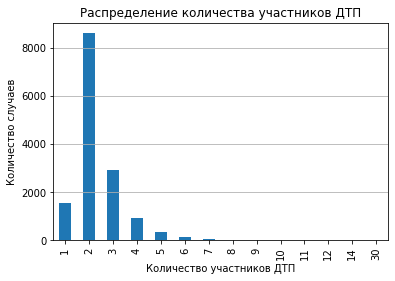

In [13]:
df['participants_count'].value_counts().sort_index().plot(kind='bar', xlabel = 'Количество участников ДТП',
                                                         ylabel = 'Количество случаев', title = 'Распределение количества участников ДТП')
plt.grid(axis = 'y')
plt.show()

В большинстве случаев количество пострадавших варируется от 1 до 3 человек (почти 90%) при этом чаще всего в авариях два пострадавших.

In [14]:
df['participants_count'].describe()

count    14517.000000
mean         2.355721
std          1.004847
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         30.000000
Name: participants_count, dtype: float64

Изучеие основных показателей распределеления количества участников ДТП демонстрирует следующее:
- среднее количество пострадавших не сильно отличается от медианы, что говорит о концентрации большинства значений около среднего, однако при этом присутствует разброс;
- нет ни одного ДТП без пострадавших (мнимальное число 1);
- максимальное количество пострадавших 30 (возможно авария произошла с участием общественного транспорта).


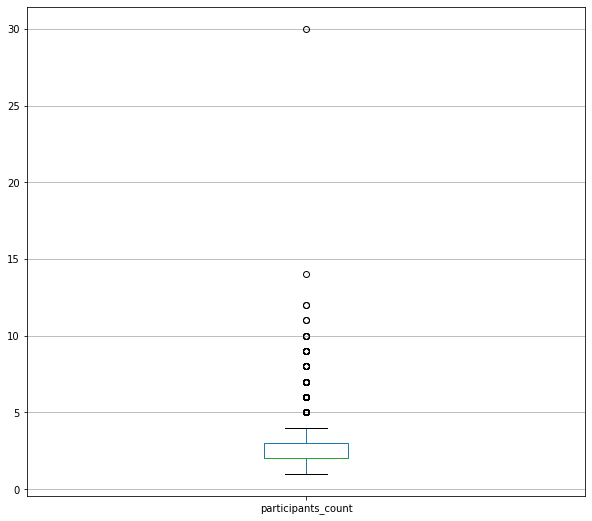

In [15]:
df['participants_count'].plot(kind = 'box', figsize = (10,9), ylabel ='')
plt.grid(axis = 'y')
plt.show()

In [16]:
df[(df['category'] == 'Столкновение') | (df['category'] == 'Наезд на пешехода')]['participants_count'].value_counts()

2     6205
3     2368
4      752
5      304
6       97
7       39
8        7
9        6
10       5
12       2
11       1
14       1
Name: participants_count, dtype: int64

Столкновение и наезд на пешехода являются самыми частыми случаями ДТП. При этом отпали случаи в которых всего один пострадавший. Соотвественно большинство случаев, в которых два и более пострадавших, связано именно с столкновением и наездом.

### 2. Предположите,  между какими столбцами в данных высокая корреляция? Проверьте своё предположение.

Для оценки корреляции воспользуемся методом phik

In [17]:
import phik
correlation_matrix = df[['id', 'point.lat', 'point.long', 'scheme', 'injured_count', 'participants_count']].phik_matrix()

# Выводим результаты
display('Корреляционная матрица с коэффициентом phi_k для примерного датафрейма:')
display(correlation_matrix)

interval columns not set, guessing: ['id', 'point.lat', 'point.long', 'scheme', 'injured_count', 'participants_count']


'Корреляционная матрица с коэффициентом phi_k для примерного датафрейма:'

,id,point.lat,point.long,scheme,injured_count,participants_count
id,1.000000,0.026482,0.000000,0.076066,0.015658,0.022621
point.lat,0.026482,1.000000,0.736831,0.029165,0.000000,0.000000
point.long,0.000000,0.736831,1.000000,0.047881,0.000000,0.045864
scheme,0.076066,0.029165,0.047881,1.000000,0.184062,0.246265
injured_count,0.015658,0.000000,0.000000,0.184062,1.000000,0.814831
participants_count,0.022621,0.000000,0.045864,0.246265,0.814831,1.000000


In [18]:
df.corr()

,id,point.lat,point.long,scheme,injured_count,participants_count
id,1.000000,0.044838,0.000309,-0.033493,-0.001796,-0.011355
point.lat,0.044838,1.000000,0.004421,0.022883,-0.029886,-0.000820
point.long,0.000309,0.004421,1.000000,0.021997,-0.005333,-0.008409
scheme,-0.033493,0.022883,0.021997,1.000000,-0.213594,-0.396280
injured_count,-0.001796,-0.029886,-0.005333,-0.213594,1.000000,0.727196
participants_count,-0.011355,-0.000820,-0.008409,-0.396280,0.727196,1.000000


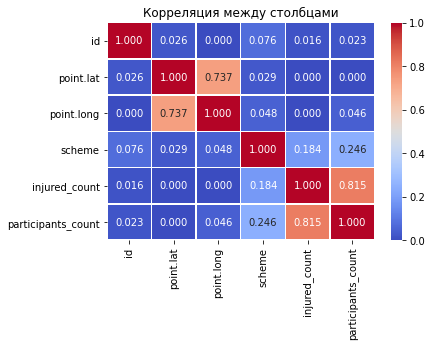

In [19]:
sns.heatmap(correlation_matrix, annot = True, fmt = '.3f', linewidth = 0.5, cmap = 'coolwarm')
plt.title('Корреляция между столбцами')
plt.show()

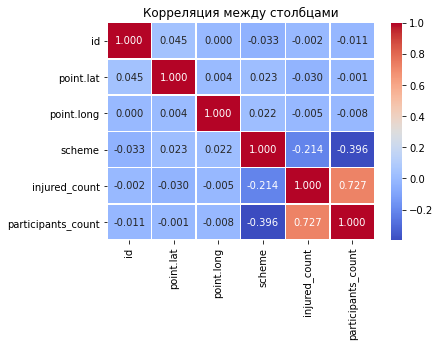

In [20]:
sns.heatmap(df.corr(), annot = True, fmt = '.3f', linewidth = 0.5, cmap = 'coolwarm')
plt.title('Корреляция между столбцами')
plt.show()

Большая корреляционная связи по двум различным методам оценки корреляции демонстррируется среди поле отражающих количество участников и количество пострадавших. Также корреляция прослеживается  между числом участников и номером схемы и количеством пострадавших и номеров схемы. Возможно эти значения имеют слабовыраженную связь (например наезд на пешехода).

Стоит также отметить, что при рассмотрении корреляции по Пирсону сильная связь найдена между широтой и долготой. Однако этот вариант стоит пресечь, поскольку обучная корреляция демонстрирует другую тенденцию. Данные о широте и долготе нелинейны и как следствие метод Пирсона не применим к к данноиу варианту.

### 3. Как связаны категории аварий и погодные условия?

In [21]:
# Проверим сколько аварий было в различной категории
df['category'].value_counts() / df.shape[0] * 100

Столкновение                                                                                                 37.356203
Наезд на пешехода                                                                                            30.061307
Съезд с дороги                                                                                                7.956189
Опрокидывание                                                                                                 6.902253
Падение пассажира                                                                                             5.083695
Наезд на препятствие                                                                                          4.594613
Наезд на велосипедиста                                                                                        4.057312
Наезд на стоящее ТС                                                                                           2.149204
Иной вид ДТП                                    

Чаще всего аварии представлены в категории столкновения, наезд на пешехода и съезд с дороги. Суммарно они составляют более 70 процентов всех случаев ДТП. Выведем топ 7 аварий и взглянем на их количество.

In [22]:
df['category'].value_counts().head(7)

Столкновение              5423
Наезд на пешехода         4364
Съезд с дороги            1155
Опрокидывание             1002
Падение пассажира          738
Наезд на препятствие       667
Наезд на велосипедиста     589
Name: category, dtype: int64

In [23]:
# Соотнесем категории аварий с погодными условиями
df.groupby(['category', 'weather'])['id'].agg('count').sort_values(ascending = False)

category               weather                          
Столкновение           ['Пасмурно']                         2514
                       ['Ясно']                             2288
Наезд на пешехода      ['Пасмурно']                         2268
                       ['Ясно']                             1572
Съезд с дороги         ['Ясно']                              586
                                                            ... 
Наезд на стоящее ТС    ['Пасмурно', 'Дождь']                   1
Наезд на препятствие   ['Ясно', 'Температура ниже -30С']       1
Столкновение           ['Пасмурно', 'Метель']                  1
Отбрасывание предмета  ['Снегопад']                            1
Наезд на стоящее ТС    ['Ясно', 'Температура ниже -30С']       1
Name: id, Length: 115, dtype: int64

Данные ДТП распределились по категориям и погодным условиям. При этом ДТП различных категорий происходят в любые погодные условия.

In [24]:
for category_name in df['category'].value_counts().head(7).index:
  display(df.query('category == @category_name').groupby(['weather', 'category'])['id'].nunique().sort_values(ascending = False))

weather                                category    
['Пасмурно']                           Столкновение    2514
['Ясно']                               Столкновение    2288
['Снегопад']                           Столкновение     274
['Дождь']                              Столкновение     205
['Пасмурно', 'Снегопад']               Столкновение      47
['Ясно', 'Температура выше +30С']      Столкновение      34
['Пасмурно', 'Дождь']                  Столкновение      21
['Метель']                             Столкновение      14
['Снегопад', 'Метель']                 Столкновение       8
['Ясно', 'Температура ниже -30С']      Столкновение       5
['Туман']                              Столкновение       4
['Пасмурно', 'Температура ниже -30С']  Столкновение       3
['Дождь', 'Снегопад']                  Столкновение       2
['Пасмурно', 'Туман']                  Столкновение       2
['Пасмурно', 'Метель']                 Столкновение       1
['Пасмурно', 'Ураганный ветер']        Столкнове

weather                                category         
['Пасмурно']                           Наезд на пешехода    2268
['Ясно']                               Наезд на пешехода    1572
['Дождь']                              Наезд на пешехода     220
['Снегопад']                           Наезд на пешехода     200
['Пасмурно', 'Дождь']                  Наезд на пешехода      36
['Пасмурно', 'Снегопад']               Наезд на пешехода      27
['Ясно', 'Температура выше +30С']      Наезд на пешехода      14
['Метель']                             Наезд на пешехода       9
['Туман']                              Наезд на пешехода       6
['Снегопад', 'Метель']                 Наезд на пешехода       4
['Дождь', 'Снегопад']                  Наезд на пешехода       2
['Пасмурно', 'Температура ниже -30С']  Наезд на пешехода       2
['Ясно', 'Температура ниже -30С']      Наезд на пешехода       2
['Дождь', 'Туман']                     Наезд на пешехода       1
['Пасмурно', 'Метель']           

weather                            category      
['Ясно']                           Съезд с дороги    586
['Пасмурно']                       Съезд с дороги    431
['Дождь']                          Съезд с дороги     51
['Снегопад']                       Съезд с дороги     50
['Пасмурно', 'Снегопад']           Съезд с дороги     13
['Пасмурно', 'Дождь']              Съезд с дороги     10
['Ясно', 'Температура выше +30С']  Съезд с дороги      6
['Метель']                         Съезд с дороги      2
['Туман']                          Съезд с дороги      2
['Пасмурно', 'Туман']              Съезд с дороги      1
['Пасмурно', 'Ураганный ветер']    Съезд с дороги      1
['Снегопад', 'Метель']             Съезд с дороги      1
['Ясно', 'Температура ниже -30С']  Съезд с дороги      1
Name: id, dtype: int64

weather                            category     
['Ясно']                           Опрокидывание    532
['Пасмурно']                       Опрокидывание    367
['Дождь']                          Опрокидывание     40
['Снегопад']                       Опрокидывание     27
['Пасмурно', 'Снегопад']           Опрокидывание     13
['Пасмурно', 'Дождь']              Опрокидывание     12
['Туман']                          Опрокидывание      3
['Ясно', 'Температура выше +30С']  Опрокидывание      3
['Метель']                         Опрокидывание      2
['Пасмурно', 'Туман']              Опрокидывание      2
['Пасмурно', 'Метель']             Опрокидывание      1
Name: id, dtype: int64

weather                                category         
['Пасмурно']                           Падение пассажира    390
['Ясно']                               Падение пассажира    315
['Дождь']                              Падение пассажира     18
['Снегопад']                           Падение пассажира      8
['Пасмурно', 'Снегопад']               Падение пассажира      2
['Пасмурно', 'Дождь']                  Падение пассажира      1
['Пасмурно', 'Температура ниже -30С']  Падение пассажира      1
['Ясно', 'Температура выше +30С']      Падение пассажира      1
['Ясно', 'Температура ниже -30С']      Падение пассажира      1
['Ясно', 'Туман']                      Падение пассажира      1
Name: id, dtype: int64

weather                            category            
['Ясно']                           Наезд на препятствие    304
['Пасмурно']                       Наезд на препятствие    300
['Дождь']                          Наезд на препятствие     26
['Снегопад']                       Наезд на препятствие     24
['Пасмурно', 'Снегопад']           Наезд на препятствие      4
['Ясно', 'Температура выше +30С']  Наезд на препятствие      4
['Пасмурно', 'Дождь']              Наезд на препятствие      2
['Туман']                          Наезд на препятствие      2
['Ясно', 'Температура ниже -30С']  Наезд на препятствие      1
Name: id, dtype: int64

weather                            category              
['Ясно']                           Наезд на велосипедиста    397
['Пасмурно']                       Наезд на велосипедиста    171
['Дождь']                          Наезд на велосипедиста     17
['Ясно', 'Температура выше +30С']  Наезд на велосипедиста      2
['Пасмурно', 'Дождь']              Наезд на велосипедиста      1
['Снегопад']                       Наезд на велосипедиста      1
Name: id, dtype: int64

Рассмотрим две первые категории, в которые входят 60% всех случаев ДТП. Во многом они схожи. Больше всего случаев происходит в пасмурную погоду - плохая видимость дороги. При этом разница в погоде при столкновения (между пасмурной и ясной) невелика, при этом она значительно меньше чем разница в категории "наезд на пешехода". Это может быть свзано с тем, что при столкновении двух автомобилей общая скорость на встречу друг к другу намного больше чем у машины и пешехода.

В других категориях наооборот больше всего аварий произошло в ясную погоду. Это вполне объяснимо, так как водителей мог ослепить солнечный свет. Однако, стоит посмотреть какое количество было ясных и пасмурных дней во взятом периоде чтобы оценить влияние погодных условий. 

### 4. Постройте процентную разбивку аварий по видам освещённости. При этом учитывайте пол участника и сделайте расчёты для мужчин и женщин отдельно.

In [25]:
# Выведем количество упоминаний водителей в авариях
df_participiants.query('role == "Водитель"')['id'].value_counts()

1984910    6
1985567    6
1984276    6
2649405    6
1983117    5
          ..
1982001    1
1986095    1
1984046    1
2973229    1
2754559    1
Name: id, Length: 13025, dtype: int64

В данных встречаются повторы, от которых следует избавиться

In [26]:
df_participiants = df_participiants.query('role == "Водитель"')
df_participiants = df_participiants.drop_duplicates (subset = 'id')

In [27]:
# Для оценки аварий по видам освещенности необходимо объединить таблицы
df_res = df_participiants.merge(df, on = 'id')

In [28]:
df_percent = df_res.groupby(['gender', 'light'])['id'].nunique().reset_index().sort_values('light')
df_percent['prcnt'] = 100*df_percent['id'] / ([df_res.query('gender == "Женский"')['id'].nunique(), df_res.query('gender == "Мужской"')['id'].nunique()] * 5)

In [29]:
df_percent.sort_values(['gender', 'prcnt'], ascending = False)

,gender,light,id,prcnt
8,Мужской,Светлое время суток,6905,63.658154
5,Мужской,"В темное время суток, освещение включено",2372,21.867798
7,Мужской,"В темное время суток, освещение отсутствует",1067,9.836821
9,Мужской,Сумерки,339,3.125288
6,Мужской,"В темное время суток, освещение не включено",164,1.511939
3,Женский,Светлое время суток,1096,64.243845
0,Женский,"В темное время суток, освещение включено",376,22.039859
2,Женский,"В темное время суток, освещение отсутствует",168,9.847597
4,Женский,Сумерки,48,2.813599
1,Женский,"В темное время суток, освещение не включено",18,1.055100


Различный между женщинами и мужчин почти нет, относительные значения близки друг к другу. При этом больше всего ДТП происходило в светлое время суток. Также стоит отметить, что мужчин водителей, которые попадали в ДТП больше чем женщин.

### 5. Исследуйте, чем отличаются аварии без пострадавших от тех, в которых был один пострадавший или более.

In [31]:
# Выберем уникальные идентификаторы тех ДТП, в которых не было пострадавших
ids_injured = df_res.query('health_status != "Не пострадал"')['id'].unique()

/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1583: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)
/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1583: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)
/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1583: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this be

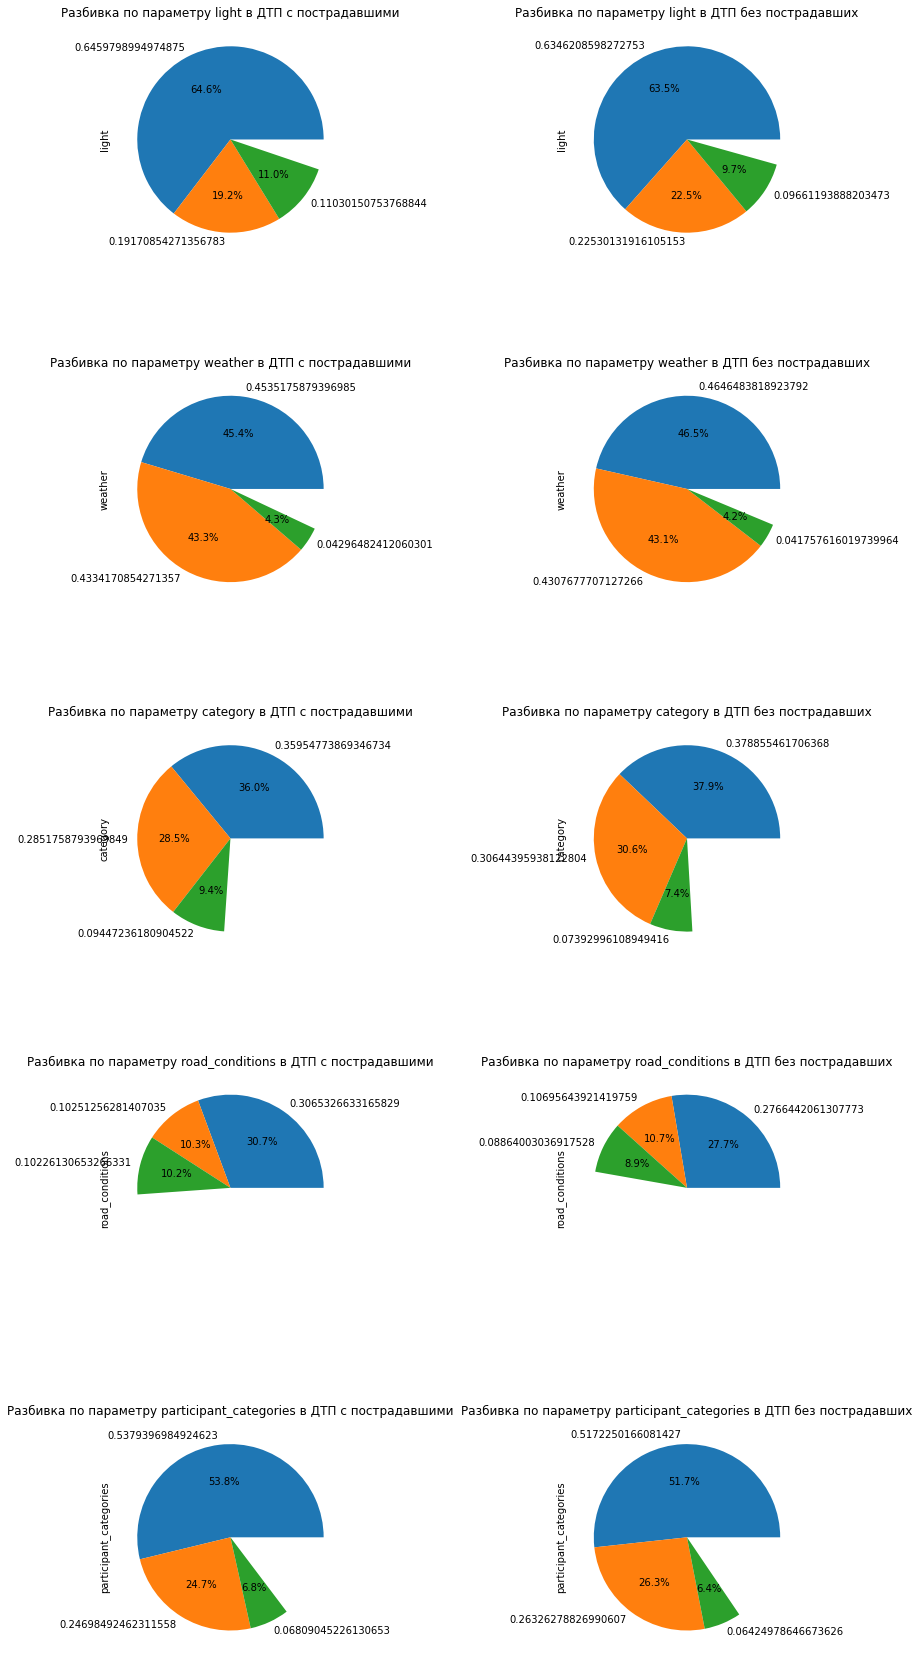

In [51]:
fig, axes = plt.subplots(nrows=5, ncols=2,  figsize=(15, 30))
plt.subplots_adjust(wspace=0.2, hspace=0.5)

counter = 0
for column_name in ['light', 'weather', 'category', 'road_conditions', 'participant_categories']:
  df_injured = df.query('id in @ids_injured')[column_name].value_counts(normalize = True).reset_index()[0:3]
  df_no_injured = df.query('id not in @ids_injured')[column_name].value_counts(normalize = True).reset_index()[0:3]
  df_injured.plot(kind = 'pie', ax=axes[counter, 0],  y=column_name, autopct='%1.1f%%', labels= df_injured[column_name], legend=False, subplots = True)
  axes[counter, 0].title.set_text(f'Разбивка по параметру {column_name} в ДТП с пострадавшими')
  df_no_injured.plot(kind = 'pie', ax=axes[counter, 1], y=column_name, autopct='%1.1f%%', labels= df_no_injured[column_name], legend=False, subplots = True)
  axes[counter, 1].title.set_text(f'Разбивка по параметру {column_name} в ДТП без пострадавших')
  counter += 1



Полученные результаты представленные виде графиков демонстрирует что большой разницы между двумя группами ДТП (с пострадавшими и без) по различным параметрам не наблюдается.

### 6. Сделайте общий вывод о связи аварийности с другими факторами. Какие рекомендации вы можете дать заказчику?

 1. Самые распространённые аварии — столкновение и наезд на пешехода — происходят при пасмурной погоде. Разрыв в числе столкновений при ясной и пасмурной погоде несущественный, однако наезды на пешеходов при ясной погоде происходят реже. Возможно, при столкновении двух машин скорость сближения выше, чем при столкновении пешехода и машины. Стоит также отметить, что съезд с дороги, опрокидывания и наезды на препятствия случались чаще в ясную погоду.

2. В разбивке по полам и освещённости различий не обнаружено. Также похожи значения топ-3 для разных признаков ДТП в зависимости от наличия пострадавших.

3. Обнаружено, что наиболее распространённое количество пострадавших в авариях — 2. Это может быть связано с самыми частыми типами аварий — «столкновение» и «наезд на пешехода».

4. В данных встречается ДТП с 30 участниками.

5. В датасете число пострадавших в `injured_count` не согласуется с `health_status`. Стоит узнать у заказчика, почему так произошло.
